# IMDB data frames 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helperfunction as hf 
%matplotlib inline

In [ ]:
ls

In [2]:
file_name = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.name.basics.csv.gz'
name = pd.read_csv(file_name)

In [3]:
name.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
# both birth and death have a lot of null value however we care about if the movie featured a hollywood star 
# we will remove both birth and death year
hf.drop_columns(name, 'birth_year','death_year')

In [5]:
# if known_for_titles are nan most likely not a star 
hf.drop_NA(name, ['known_for_titles'])

In [7]:
# map director to name_id 
# turn name into dictionary # use this for title_crew_csv 
name_dict = {}
for _, row in name.iterrows():
    name_dict[row['nconst']] = row['primary_name']

In [8]:
# filter for director and actor and actress, writers  in primary_profession (that will be our focus )
name = name[name.primary_profession.str.contains('actor|director|actress|writer', regex = True, na = False)]

In [9]:
# drop primary profession to reduce data size 
hf.drop_columns(name, 'primary_profession')

In [10]:
name['num_movie_known'] = name.known_for_titles.str.split(',').apply(lambda x: len(x))

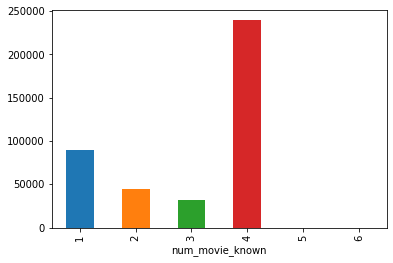

In [11]:
name.groupby('num_movie_known').size().plot.bar()  # set 4 or more known movie as stars 

In [12]:
# we will check to see if known_for_titles a good way to see star check a few popular hollywood star
stars = ['Tom Cruise', 'Brad Pitt', 'Jennifer lawrence', 'Meryl Streep', \
         'Leonardo DiCaprio',  'Steven Spielberg','Clint Eastwood']
name[name.primary_name.isin(stars)]  # confirm that 4 star is a good place to cut for stars 

,nconst,primary_name,known_for_titles,num_movie_known
18533,nm0000658,Meryl Streep,"tt1135503,tt0918927,tt0458352,tt0089755",4
24026,nm0000093,Brad Pitt,"tt1210166,tt0114746,tt0356910,tt0816711",4
24027,nm0000142,Clint Eastwood,"tt0405159,tt0105695,tt1205489,tt0112579",4
39130,nm0000129,Tom Cruise,"tt0325710,tt0116695,tt0092099,tt0181689",4
76403,nm0000138,Leonardo DiCaprio,"tt0407887,tt0120338,tt0993846,tt1375666",4
85758,nm0000229,Steven Spielberg,"tt0108052,tt0082971,tt0083866,tt0120815",4


In [121]:
import importlib
importlib.reload(hf)

<module 'helperfunction' from '/Users/mindy/Documents/flatiron_school/dc_ds_06_03_mod1_project/helperfunction.py'>

In [18]:
# keep only num_movie_known is 4 or higher 
masks = hf.create_masks(name, ['num_movie_known'],[4],relations = [np.greater_equal])
name = name[masks[0]]

In [19]:
name.head()

,nconst,primary_name,known_for_titles,num_movie_known
2,nm0062070,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898",4
5,nm0062879,Ruel S. Bayani,"tt2590280,tt0352080,tt0216559,tt2057445",4
9,nm0063750,Lindsay Beamish,"tt0404826,tt0111756,tt0367027,tt1492842",4
10,nm0064023,Bryan Beasley,"tt3501180,tt1485100,tt1358897,tt1387162",4
12,nm0065847,Michael Frost Beckner,"tt0108171,tt0095953,tt0266987,tt0285332",4


In [20]:
# remove known for title and num_movie known as we only need nconst and primary name
hf.drop_columns(name, 'known_for_titles','num_movie_known')

In [21]:
name.head()

,nconst,primary_name
2,nm0062070,Bruce Baum
5,nm0062879,Ruel S. Bayani
9,nm0063750,Lindsay Beamish
10,nm0064023,Bryan Beasley
12,nm0065847,Michael Frost Beckner


In [22]:
# title with actors 
file_crew = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.principals.csv.gz'
title_crew = pd.read_csv(file_crew)

In [24]:
title_crew.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [25]:
# remove characters, job, ordering is for repeating movie id with crew info 
hf.drop_columns(title_crew, 'characters','job','ordering')

In [26]:
title_crew.category.value_counts()  # only going to look at actor, director, and actress,writers

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [27]:
# only interested in actor, actress, and producer 
title_crew = title_crew[title_crew.category.isin(['actor','director','actress','writer'])]

In [28]:
title_crew.category.unique()  # double check 

array(['actor', 'director', 'actress', 'writer'], dtype=object)

In [29]:
title_crew.shape, name.shape

((623676, 3), (239046, 2))

In [44]:
# merge the title_crew with name crew with nconst 
name_crew=hf.merge_tables(title_crew, name, 'nconst','inner')

In [45]:
name_crew.head()

,tconst,nconst,category,primary_name
0,tt0111414,nm0246005,actor,Tommy Dysart
1,tt0111414,nm0398271,director,Frank Howson
2,tt5573596,nm0398271,director,Frank Howson
3,tt0323808,nm2694680,actor,Henry Garrett
4,tt0323808,nm0574615,actor,Graham McTavish


In [46]:
# remove nconst as no longer useful
hf.drop_columns(name_crew, 'nconst')

In [47]:
name_crew.primary_name.nunique()  # 192142 writer/actor/actress/directors 

192142

In [48]:
# we will also make two extra column as 0 as false 1 as True
name_crew['num_known_director'] = hf.object_binary(name_crew, 'category', 'director')

In [49]:
name_crew['num_known_actor_actress']= hf.object_binary(name_crew, 'category', 'actor', 'actress')

In [50]:
name_crew['num_known_writer'] = hf.object_binary(name_crew, 'category', 'writer')

In [51]:
name_crew.head()

,tconst,category,primary_name,num_known_director,num_known_actor_actress,num_known_writer
0,tt0111414,actor,Tommy Dysart,0,1,0
1,tt0111414,director,Frank Howson,1,0,0
2,tt5573596,director,Frank Howson,1,0,0
3,tt0323808,actor,Henry Garrett,0,1,0
4,tt0323808,actor,Graham McTavish,0,1,0


In [52]:
name_crew = name_crew.groupby('tconst').sum()  # group by movies 

In [68]:
name_crew.reset_index(inplace = True)

In [55]:
#title then merge 
file_akas = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.akas.csv.gz'
title_akas = pd.read_csv(file_akas)
# title_akas.head()  # number of times the movie is aired in other coun

In [56]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [57]:
title_akas[title_akas.is_original_title == 1].language.nunique()  # only 2 not a lot of info 

2

In [58]:
# remove unncessary column 
hf.drop_columns(title_akas, 'ordering','title','language','types','attributes')

In [59]:
title_akas[title_akas.is_original_title == 1].region.nunique()  # only 3 region, so not useful 

3

In [60]:
# number of region showed and orginal language column
num_region = title_akas.groupby('title_id').region.nunique()

In [64]:
region_title = num_region.reset_index()
region_title.head()  # num of regions show for each movie

,title_id,region
0,tt0063540,1
1,tt0066787,2
2,tt0069049,12
3,tt0069204,1
4,tt0100275,3


In [65]:
hf.rename_columns(region_title, {'title_id':'tconst','region':'num_region'})

In [66]:
region_title.head()

,tconst,num_region
0,tt0063540,1
1,tt0066787,2
2,tt0069049,12
3,tt0069204,1
4,tt0100275,3


In [70]:
region_title  # will merge that with the currently merged data frame 

name_crew_region = hf.merge_tables(name_crew, region_title, 'tconst', how = 'inner')

In [71]:
name_crew_region.head()

,tconst,num_known_director,num_known_actor_actress,num_known_writer,num_region
0,tt0063540,1,4,4,1
1,tt0066787,1,4,0,2
2,tt0069049,1,4,0,12
3,tt0069204,1,5,1,1
4,tt0100275,2,4,1,3


In [80]:
file_basics = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.basics.csv.gz'
title_basics = pd.read_csv(file_basics)

In [73]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [74]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [81]:
# remove null values for genres and runtime_mins 
hf.drop_NA(title_basics, ['genres','runtime_minutes'])

In [76]:
# split genres into each individual row for each movie 

genres = hf.split_rows(title_basics,'tconst','genres',',')

In [77]:
# rename column
hf.rename_columns(genres, {'index': 'genre', 0:'tconst'})
genres.head()

,genres,tconst
0,Action,tt0063540
1,Crime,tt0063540
2,Drama,tt0063540
3,Biography,tt0066787
4,Drama,tt0066787


In [82]:
# remove genres columns from title_basics
hf.drop_columns(title_basics, 'genres','primary_title')

In [83]:
# put genres back with start_year and runtime_mins
title_basics = hf.merge_tables(genres, title_basics,'tconst', how = 'inner')

In [84]:
#title_basics.drop(columns = 'genres', inplace = True)
title_basics.head()

,genres,tconst,original_title,start_year,runtime_minutes
0,Action,tt0063540,Sunghursh,2013,175.0
1,Crime,tt0063540,Sunghursh,2013,175.0
2,Drama,tt0063540,Sunghursh,2013,175.0
3,Biography,tt0066787,Ashad Ka Ek Din,2019,114.0
4,Drama,tt0066787,Ashad Ka Ek Din,2019,114.0


In [85]:
title_basics.shape

(193732, 5)

In [86]:
name_crew_region_genre = hf.merge_tables(name_crew_region, title_basics, 'tconst', 'inner')

In [89]:
name_crew_region_genre.head()

,tconst,num_known_director,num_known_actor_actress,num_known_writer,num_region,genres,original_title,start_year,runtime_minutes
0,tt0063540,1,4,4,1,Action,Sunghursh,2013,175.0
1,tt0063540,1,4,4,1,Crime,Sunghursh,2013,175.0
2,tt0063540,1,4,4,1,Drama,Sunghursh,2013,175.0
3,tt0066787,1,4,0,2,Biography,Ashad Ka Ek Din,2019,114.0
4,tt0066787,1,4,0,2,Drama,Ashad Ka Ek Din,2019,114.0


In [122]:
file_director_writer ='https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.crew.csv.gz'
writers_directors = pd.read_csv(file_director_writer)
writers_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [123]:
writer_director.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [124]:
directors = writer_director[['tconst','directors']].dropna()

In [125]:
writers = writer_director[['tconst','writers']].dropna()

In [126]:
writers['writers'] = hf.create_list(writers,'writers',',')
directors['directors']= hf.create_list(directors, 'directors',',')

In [127]:
writers_directors = hf.merge_tables(writers, directors, 'tconst', how = 'inner')

In [128]:
writers_directors.head()

,tconst,writers,directors
0,tt0285252,[nm0899854],[nm0899854]
1,tt0462036,[nm1940585],[nm1940585]
2,tt0835418,"[nm0310087, nm0841532]",[nm0151540]
3,tt0878654,[nm0284943],"[nm0089502, nm2291498, nm2292011]"
4,tt0996958,"[nm2286991, nm2651190]",[nm2286991]


In [129]:
# for writer_director mapping 
writers_directors[['writers','directors']]= writers_directors[['writers','directors']].applymap(lambda x: [name_dict.get(i, np.nan) for i in x])

In [130]:
writers_directors.head()

,tconst,writers,directors
0,tt0285252,[Tony Vitale],[Tony Vitale]
1,tt0462036,[Bill Haley],[Bill Haley]
2,tt0835418,"[Peter Gaulke, Gerry Swallow]",[Jay Chandrasekhar]
3,tt0878654,[Randall Fontana],"[Albert Pyun, Joe Baile, Howie Askins]"
4,tt0996958,"[Tara Cardinal, Kim Pritekel]",[Tara Cardinal]


In [131]:
name_crew_region_genre_writer_directors = hf.merge_tables(writers_directors, name_crew_region_genre, 'tconst','inner')

In [132]:
name_crew_region_genre_writer_directors.shape

(126570, 11)

In [133]:
# imdb title rating 
file_rating = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_06_03_19/master/module_1/week_3_project/data/imdb.title.ratings.csv.gz'
rating = pd.read_csv(file_rating)

In [134]:
rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [136]:
name_crew_region_genre_writer_directors_rating = hf.merge_tables(name_crew_region_genre_writer_directors, rating, 'tconst', 'inner')

In [150]:
merged_imdb = name_crew_region_genre_writer_directors_rating

In [151]:
merged_imdb.columns

Index(['tconst', 'writers', 'directors', 'num_known_director',
       'num_known_actor_actress', 'num_known_writer', 'num_region', 'genres',
       'original_title', 'start_year', 'runtime_minutes', 'averagerating',
       'numvotes'],
      dtype='object')

In [157]:
# remove tconst as no longer useful 
hf.drop_columns(merged_imdb, 'tconst')

In [158]:
merged_imdb.to_pickle('imdbcombined.pkl')  # save to pickle file 